Merge multiple datasets collected from the following source : https://www.kaggle.com/datasets/zygmunt/goodbooks-10k

In [3]:
import pandas as pd
df = pd.read_csv("./DATASETS/DATASET_collected.csv")
df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tags,ratings_count_from_ratings,average_rating_from_ratings,to_read_count
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"['survival', 'science-fiction', 'favorites', '...",NaN,NaN,NaN
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,...,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,"['j-k-rowling', 'owned-books', 'read-in-2015',...",100.0,3.09,287.0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005,Twilight,...,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,"['owned-books', 'séries', 'science-fiction', '...",NaN,NaN,NaN
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960,To Kill a Mockingbird,...,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,"['clàssics', 'owned-books', 'pulitzer', 'read-...",100.0,3.65,50.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925,The Great Gatsby,...,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"['clàssics', 'owned-books', 'read-in-2015', '1...",100.0,3.74,48.0


Add nationality column using Wikipedia API and commun nationalities to optimize the mapping 

In [ ]:
import requests
import time

# STEP 1: Load the cleaned dataset
df = pd.read_csv("DATASET_collected.csv")

# STEP 2: Extract unique authors
unique_authors = df["authors"].dropna().unique()

# STEP 3: Define function to extract nationality from Wikipedia
def get_nationality(author_name):
    try:
        query = author_name.replace(" ", "_")
        url = f"https://en.wikipedia.org/api/rest_v1/page/summary/{query}"
        response = requests.get(url)
        if response.status_code == 200:
            summary = response.json().get("extract", "")
            # Search for common nationality keywords
            keywords = [
                "American", "British", "Canadian", "French", "German", "Indian",
                "Australian", "Irish", "Spanish", "Russian", "Italian", "Dutch",
                "Japanese", "Chinese", "Brazilian", "Swedish", "Polish", "Norwegian"
            ]
            for keyword in keywords:
                if keyword.lower() in summary.lower():
                    return keyword
        return None
    except Exception as e:
        return None

# STEP 4: Create a dictionary mapping authors to nationalities 
author_nationality_map = {}
for author in unique_authors:
    nationality = get_nationality(author)
    author_nationality_map[author] = nationality
    print(f"{author}: {nationality}")
    time.sleep(1)  # Be nice to Wikipedia API

# STEP 5: Map nationalities back into the dataframe
df["author_nationality"] = df["authors"].map(author_nationality_map)

# STEP 6: Save the enriched dataset 
df.to_csv("./DATASETS/cleaned_books_with_nationality.csv", index=False)
print("✅ Done! Saved to 'cleaned_books_with_nationality.csv'")

Smart mapping for books with multiple authors

In [ ]:
df = pd.read_csv("./DATASETS/cleaned_books_with_nationality.csv")

# Filter authors missing nationality
missing_df = df[df["author_nationality"].isna()].copy()
unique_missing_authors = missing_df["authors"].dropna().unique()

# Nationality detection function (smarter)
def get_nationality_smart(author_string):
    nationalities = [
        "American", "British", "Canadian", "French", "German", "Indian", "Australian", "Irish",
        "Spanish", "Russian", "Italian", "Dutch", "Japanese", "Chinese", "Brazilian", "Swedish", "Polish", "Norwegian"
    ]
    try:
        names = [a.strip() for a in author_string.split(",")]
        for name in names:
            query = name.replace(" ", "_")
            url = f"https://en.wikipedia.org/api/rest_v1/page/summary/{query}"
            response = requests.get(url)
            if response.status_code == 200:
                summary = response.json().get("extract", "")
                for n in nationalities:
                    if n.lower() in summary.lower():
                        return n
        return None
    except:
        return None

# Enrich authors
author_nat_map = {}
for author in unique_missing_authors:
    nationality = get_nationality_smart(author)
    author_nat_map[author] = nationality
    print(f"{author} → {nationality}")
    time.sleep(1)

# Update the original dataframe
df["author_nationality"] = df["author_nationality"].fillna(df["authors"].map(author_nat_map))
df["author_nationality"] = df["author_nationality"].fillna("Unknown")

# Save final enriched dataset
df.to_csv("./DATASETS/BOOKS_DATASET_final.csv", index=False)
print("✅ Enrichment complete — saved to BOOKS_DATASET_final.csv")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./DATASETS/BOOKS_DATASET_final.csv")
print(df.head()) 
print(df.info())
colnames = list(df.columns)
print(colnames)
df

        isbn                      authors  original_publication_year  \
0  439023483              Suzanne Collins                       2008   
1  439554934  J.K. Rowling, Mary GrandPré                       1997   
2  316015849              Stephenie Meyer                       2005   
3   61120081                   Harper Lee                       1960   
4  743273567          F. Scott Fitzgerald                       1925   

                                               title language_code  \
0            The Hunger Games (The Hunger Games, #1)           eng   
1  Harry Potter and the Sorcerer's Stone (Harry P...           eng   
2                            Twilight (Twilight, #1)           eng   
3                              To Kill a Mockingbird           eng   
4                                   The Great Gatsby           eng   

   average_rating  ratings_count  work_ratings_count  work_text_reviews_count  \
0            4.34        4780653             4942365             

,isbn,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,to_read_count,author_nationality,age_group,main_genre,sale price,avg_sale_price
0,439023483,Suzanne Collins,2008,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,NaN,American,Young Adult,fantasy,NaN,4.094286
1,439554934,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,287.0,British,Children,fantasy,NaN,4.927174
2,316015849,Stephenie Meyer,2005,"Twilight (Twilight, #1)",eng,3.57,3866839,3916824,95009,NaN,American,Young Adult,fantasy,NaN,4.094286
3,61120081,Harper Lee,1960,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,50.0,American,Children,thriller,NaN,4.802500
4,743273567,F. Scott Fitzgerald,1925,The Great Gatsby,eng,3.89,2683664,2773745,51992,48.0,American,Young Adult,romance,NaN,4.641509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,224079948,Ian Mortimer,2008,The Time Traveller's Guide to Medieval England...,eng,3.99,9824,12115,970,NaN,British,Adult,fantasy,NaN,4.827571
7789,810983559,"Michael Buckley, Peter Ferguson",2009,"The Everafter War (The Sisters Grimm, #7)",eng,4.32,12493,12965,455,NaN,American,Children,fantasy,NaN,4.927174
7790,441019455,Ilona Andrews,2010,"Bayou Moon (The Edge, #2)",eng,4.09,17204,18856,1180,NaN,American,Adult,fantasy,NaN,4.827571
7791,067973371X,Robert A. Caro,1990,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,4.25,12582,12952,395,NaN,American,Young Adult,historical,NaN,4.660000


In [5]:
# on supprimeles livres dont le genre est 'unknown'
df = df[df["main_genre"] != "unknown"]
# on remplacer les valeurs manquantes dans sale price par la moyenne par genre
df["sale price"] = df.groupby("main_genre")["sale price"].transform(lambda x: x.fillna(x.mean()))
# on remplacer les valeurs manquantes dans to_read_count par 0
df["to_read_count"].fillna(0, inplace=True)


df = df.dropna(subset=["isbn","title","language_code","authors"])
df.drop_duplicates(subset=["title","authors"])
print(df["language_code"].unique()) 
df = df[df["language_code"].isin(['eng','en-CA'])]
df

['eng' 'en-CA' 'spa' 'fre' 'nl' 'ger' 'nor' 'jpn' 'vie' 'pol' 'ara' 'dan'
 'per' 'ind' 'por' 'swe' 'mul' 'rus' 'ita']


C:\Users\amine\AppData\Local\Temp\ipykernel_10032\2783951970.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["to_read_count"].fillna(0, inplace=True)


,isbn,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,to_read_count,author_nationality,age_group,main_genre,sale price,avg_sale_price
0,439023483,Suzanne Collins,2008,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,0.0,American,Young Adult,fantasy,4.674677,4.094286
1,439554934,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,287.0,British,Children,fantasy,4.674677,4.927174
2,316015849,Stephenie Meyer,2005,"Twilight (Twilight, #1)",eng,3.57,3866839,3916824,95009,0.0,American,Young Adult,fantasy,4.674677,4.094286
3,61120081,Harper Lee,1960,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,50.0,American,Children,thriller,5.154091,4.802500
4,743273567,F. Scott Fitzgerald,1925,The Great Gatsby,eng,3.89,2683664,2773745,51992,48.0,American,Young Adult,romance,4.399820,4.641509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,224079948,Ian Mortimer,2008,The Time Traveller's Guide to Medieval England...,eng,3.99,9824,12115,970,0.0,British,Adult,fantasy,4.674677,4.827571
7789,810983559,"Michael Buckley, Peter Ferguson",2009,"The Everafter War (The Sisters Grimm, #7)",eng,4.32,12493,12965,455,0.0,American,Children,fantasy,4.674677,4.927174
7790,441019455,Ilona Andrews,2010,"Bayou Moon (The Edge, #2)",eng,4.09,17204,18856,1180,0.0,American,Adult,fantasy,4.674677,4.827571
7791,067973371X,Robert A. Caro,1990,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,4.25,12582,12952,395,0.0,American,Young Adult,historical,4.194918,4.660000


In [6]:
#SCORING : 
df["score_rating"] = df["average_rating"] / df["average_rating"].max()
df["score_recency"] = (df["original_publication_year"] - df["original_publication_year"].min()) / \
                     (df["original_publication_year"].max() - df["original_publication_year"].min())
df["score_pricing"] = df["avg_sale_price"] / df["avg_sale_price"].max()
df["score_final"] = (0.4*df["score_rating"] +0.3*df["score_recency"]+ 0.3*df["score_pricing"])

df_score = df[['score_rating','score_recency','score_pricing','score_final']]

df_score.describe()

,score_rating,score_recency,score_pricing,score_final
count,6572.000000,6572.000000,6550.000000,6550.000000
mean,0.835158,0.888579,0.546118,0.764483
std,0.046133,0.139573,0.069207,0.049898
min,0.726141,0.000000,0.229353,0.465232
25%,0.802905,0.871429,0.529451,0.749267
50%,0.836100,0.938095,0.561258,0.772334
75%,0.867220,0.966667,0.575829,0.792351
max,1.000000,1.000000,1.000000,0.970587


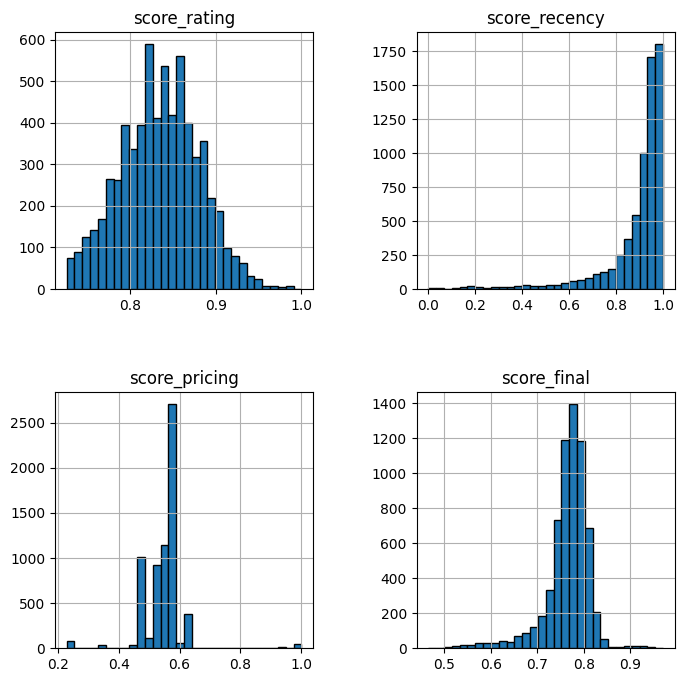

In [9]:
df_score.hist(figsize=(8, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.4, wspace=0.4)

In [10]:
df = df.sort_values(by="score_final", ascending=False)

# Équilibrer les genres
top_per_genre = df.groupby("main_genre").head(500)

# Équilibrer les groupes d'âge 
top_per_age = df.groupby("age_group").head(2000)

# Équilibrer la nationalité des auteurs 
top_per_country = df.groupby("author_nationality").head(500)

# Fusionner
df_selection = pd.concat([top_per_genre, top_per_age, top_per_country])

# Limiter à 5 000 livres
df_selection = df_selection.head(5000)
df_selection
df_selection.to_csv("./DATASETS/selection_books.csv", index=False)
df.to_csv("./DATASETS/BOOKS_DATASET_final_with_scores.csv", index =False)


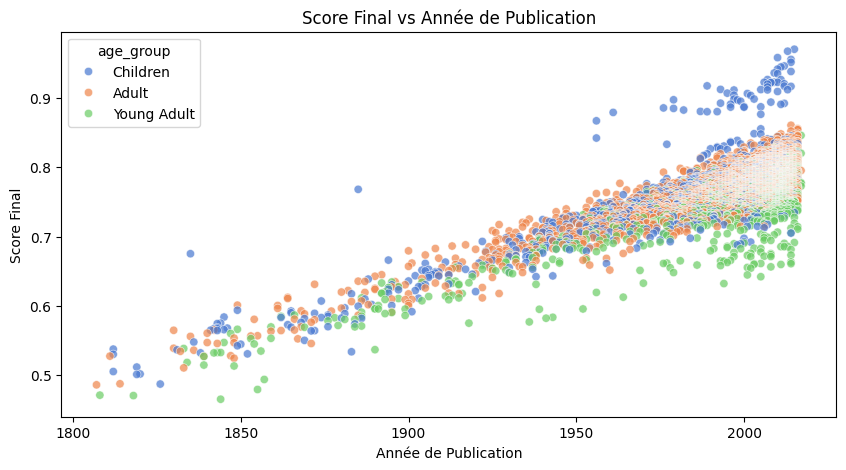

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="original_publication_year", y="score_final", hue="age_group", palette="muted", alpha=0.7)
plt.title("Score Final vs Année de Publication")
plt.xlabel("Année de Publication")
plt.ylabel("Score Final")
plt.show()

C:\Users\amine\AppData\Local\Temp\ipykernel_10032\1002167048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_selection, x="main_genre", order=df["main_genre"].value_counts().index, palette="viridis")


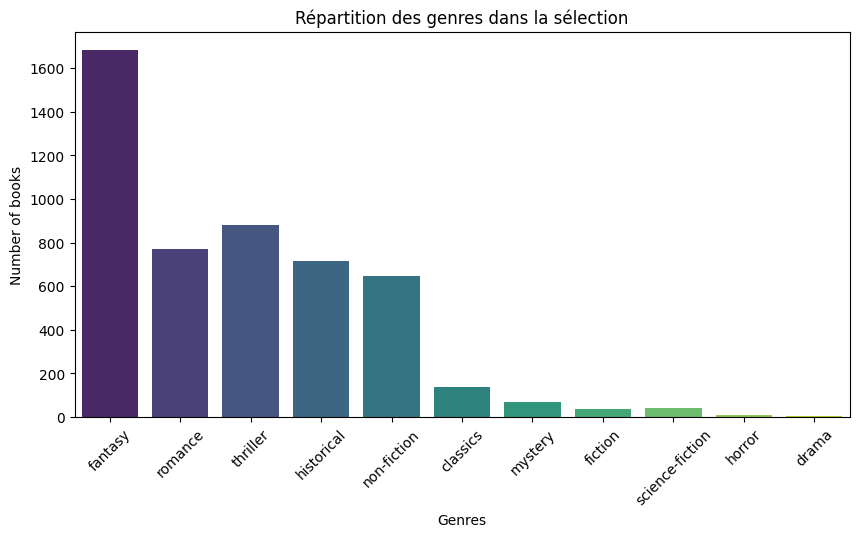

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_selection, x="main_genre", order=df["main_genre"].value_counts().index, palette="viridis")
plt.title("Répartition des genres dans la sélection")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Number of books")
plt.show()

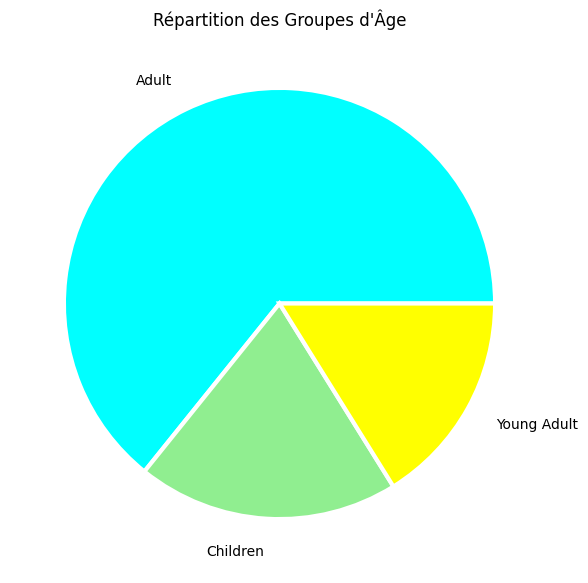

In [13]:
plt.figure(figsize=(7,7))
df_selection["age_group"].value_counts().plot.pie(colors=["cyan","lightgreen","yellow"],labeldistance=1.15, wedgeprops={'linewidth' : 3,'edgecolor':'white'})
plt.title("Répartition des Groupes d'Âge")
plt.ylabel("")
plt.show()

C:\Users\amine\AppData\Local\Temp\ipykernel_10032\1668819347.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


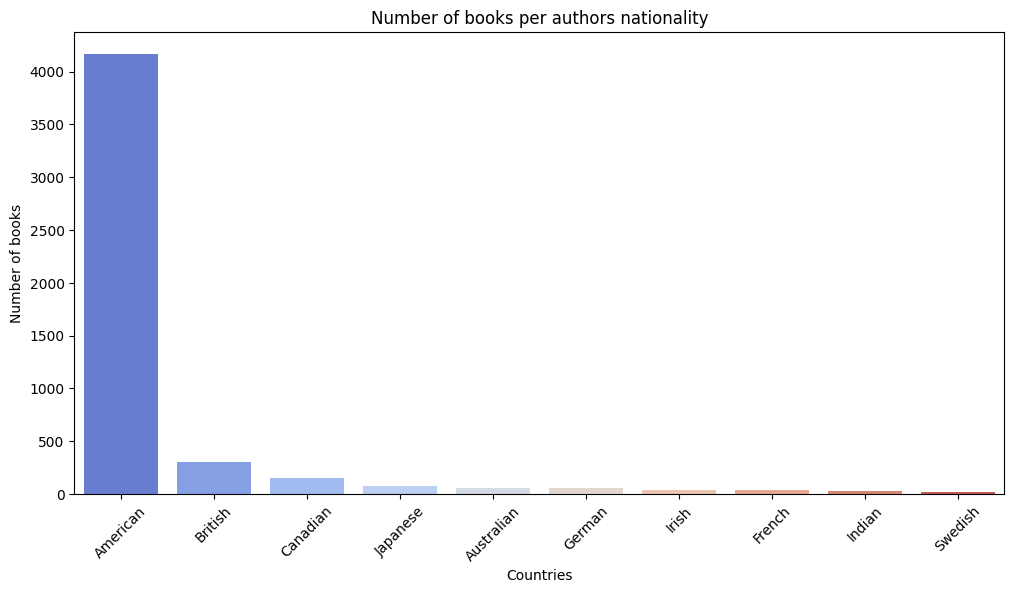

In [14]:
top_countries = df_selection["author_nationality"].value_counts().head(10)  

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.title("Number of books per authors nationality")
plt.xlabel("Countries")
plt.ylabel("Number of books")
plt.xticks(rotation=45)
plt.show()